## 1. Obtención de los nodos de interpolación

Resultados para la función: sin(x)
  Número de nodos: 11, Método: equidistant


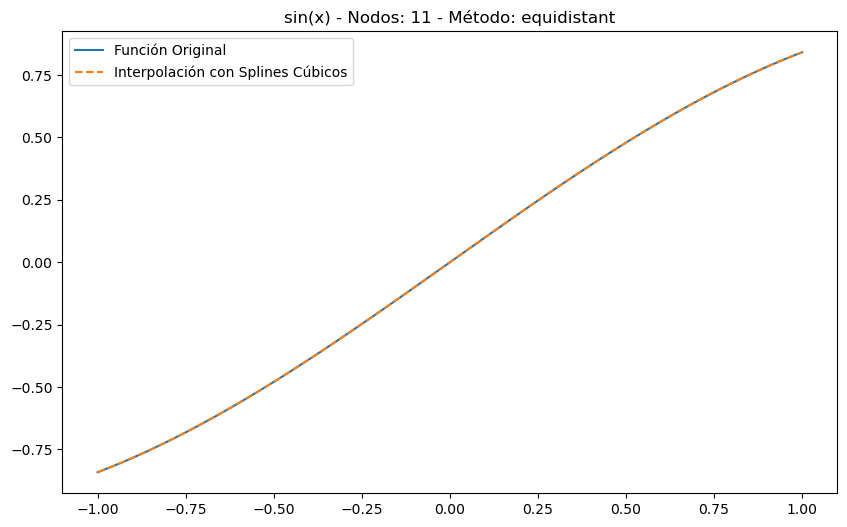

    Error medio: 0.000006
    Tiempo de cálculo: 0.004319 segundos

  Número de nodos: 11, Método: chebyshev


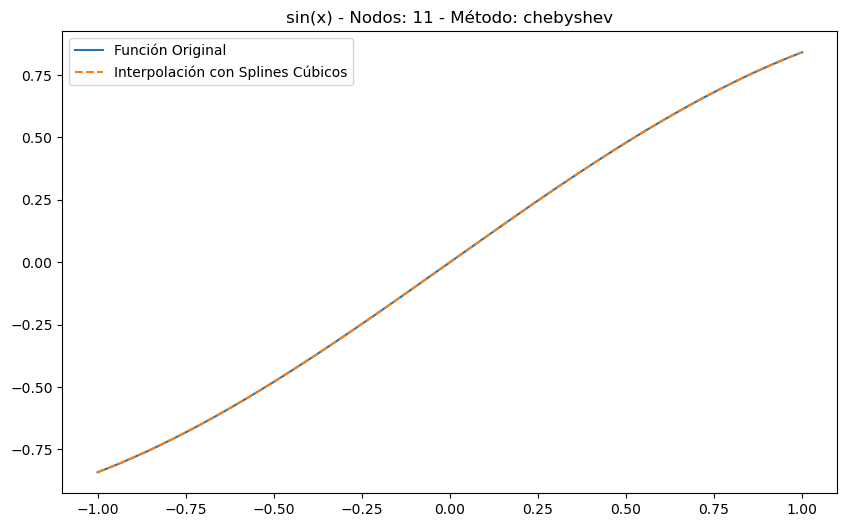

    Error medio: 0.000003
    Tiempo de cálculo: 0.000167 segundos

  Número de nodos: 21, Método: equidistant


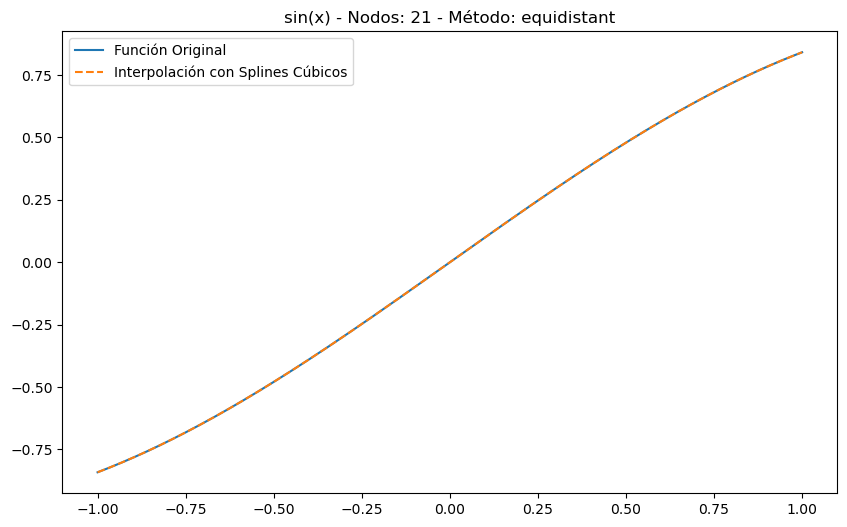

    Error medio: 0.000000
    Tiempo de cálculo: 0.000160 segundos

  Número de nodos: 21, Método: chebyshev


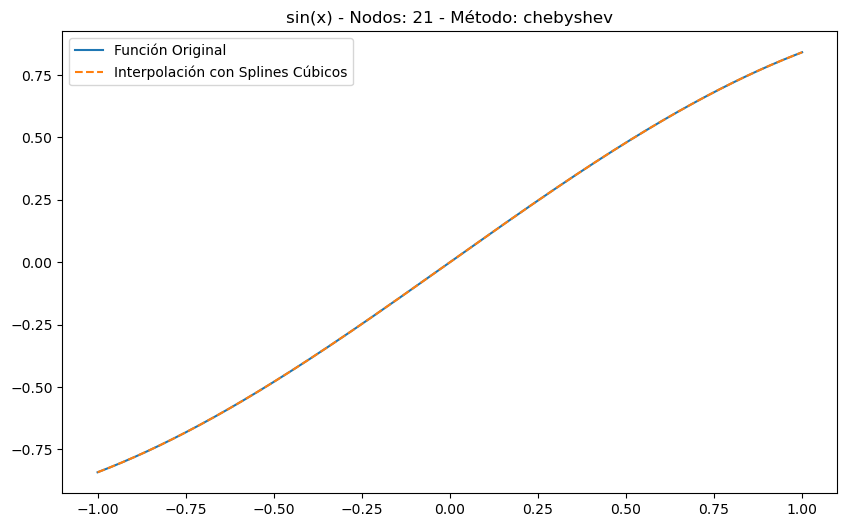

    Error medio: 0.000000
    Tiempo de cálculo: 0.000153 segundos

Resultados para la función: 1 / (1 + 25x^2)
  Número de nodos: 11, Método: equidistant


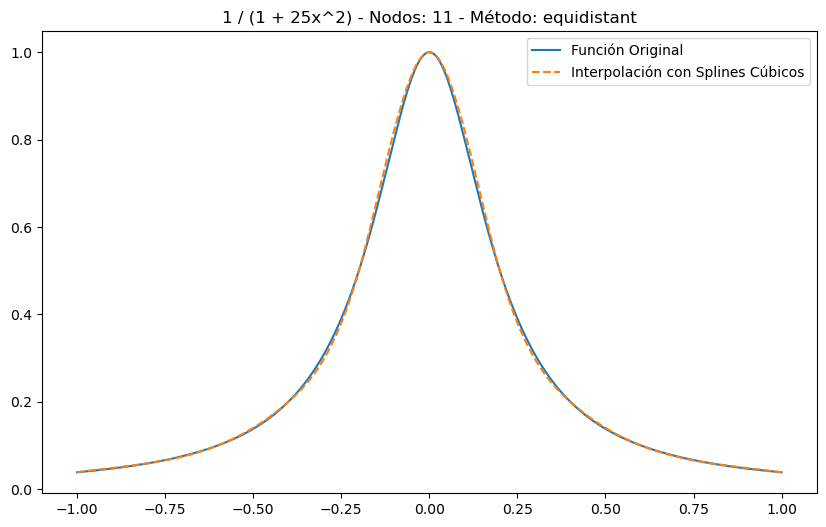

    Error medio: 0.004298
    Tiempo de cálculo: 0.000141 segundos

  Número de nodos: 11, Método: chebyshev


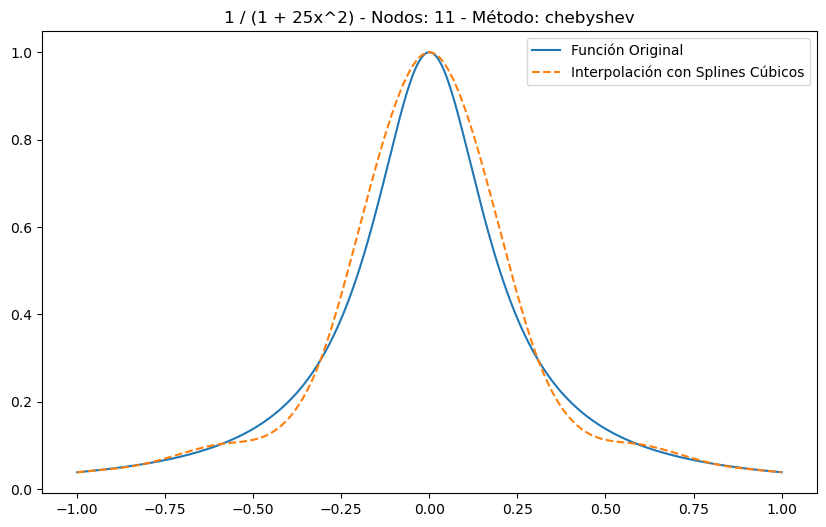

    Error medio: 0.025676
    Tiempo de cálculo: 0.000152 segundos

  Número de nodos: 21, Método: equidistant


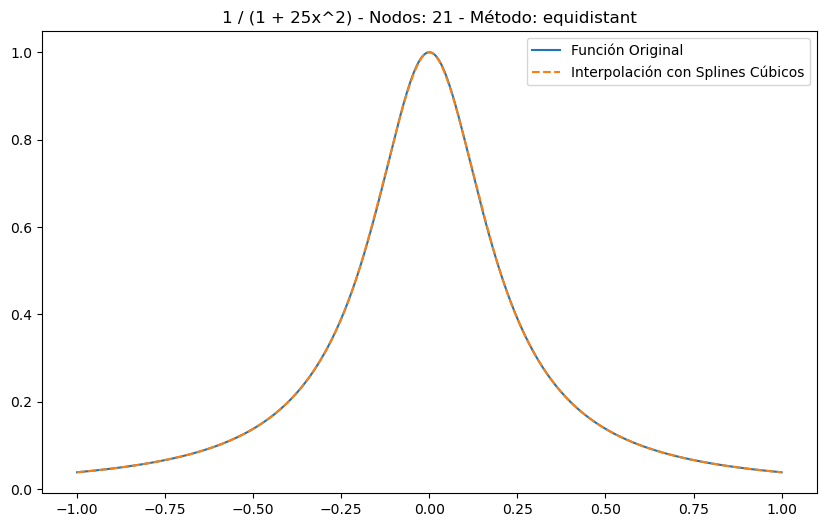

    Error medio: 0.000405
    Tiempo de cálculo: 0.000142 segundos

  Número de nodos: 21, Método: chebyshev


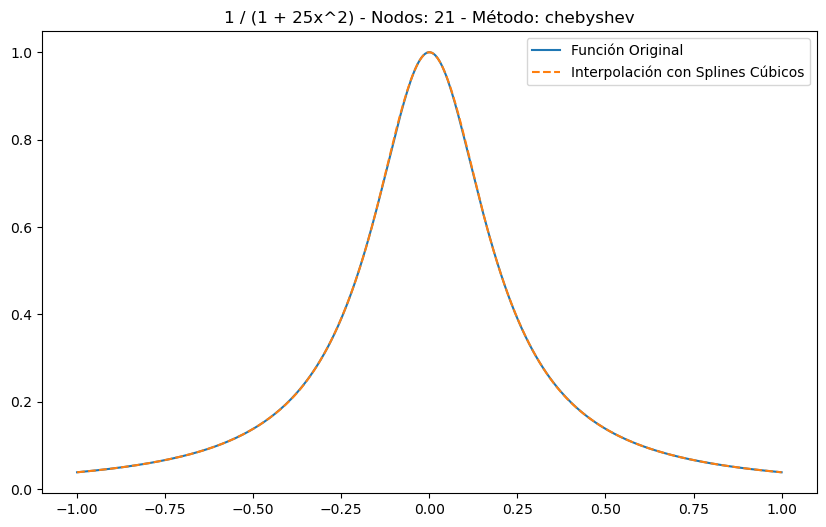

    Error medio: 0.000383
    Tiempo de cálculo: 0.000143 segundos

Resultados para la función: e^(-20x^2)
  Número de nodos: 11, Método: equidistant


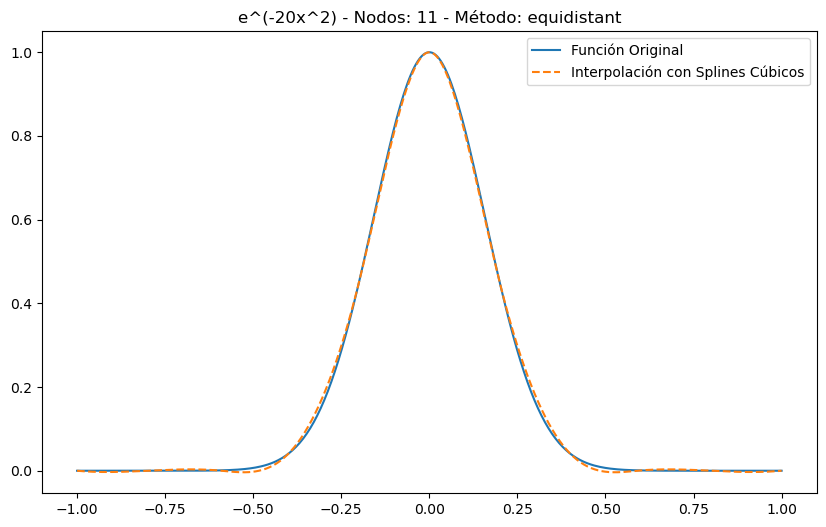

    Error medio: 0.005145
    Tiempo de cálculo: 0.000130 segundos

  Número de nodos: 11, Método: chebyshev


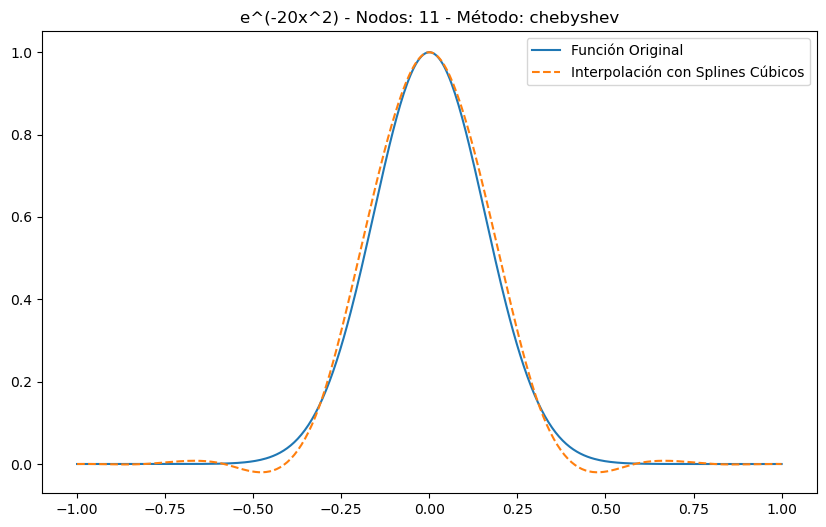

    Error medio: 0.015911
    Tiempo de cálculo: 0.000149 segundos

  Número de nodos: 21, Método: equidistant


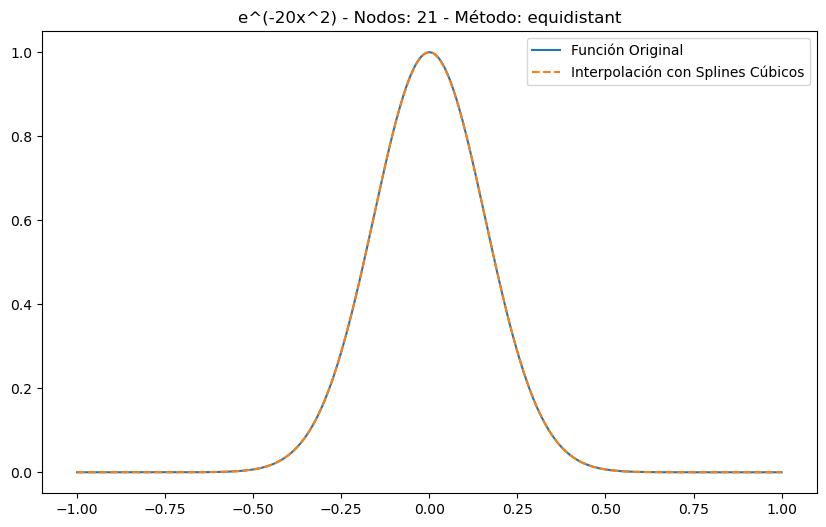

    Error medio: 0.000217
    Tiempo de cálculo: 0.000157 segundos

  Número de nodos: 21, Método: chebyshev


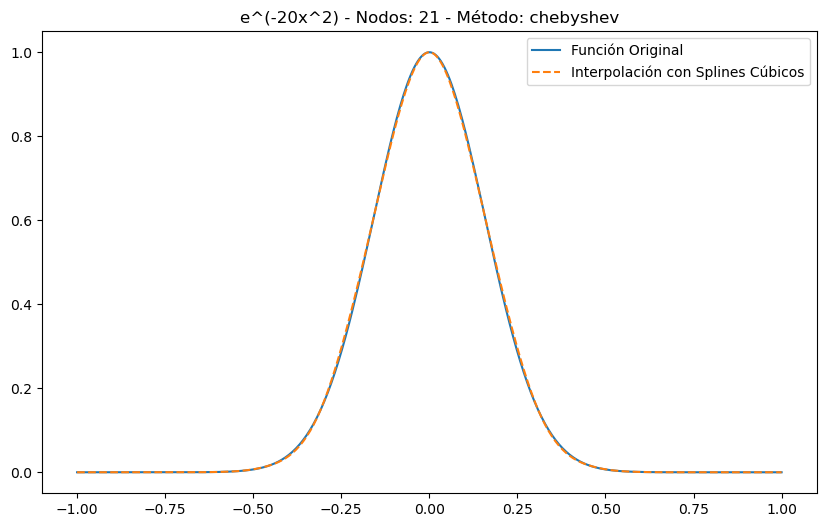

    Error medio: 0.001933
    Tiempo de cálculo: 0.000145 segundos



In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import time

# Definición de las funciones
def f1(x):
    return np.sin(x)

def f2(x):
    return 1 / (1 + 25 * x**2)

def f3(x):
    return np.exp(-20 * x**2)

# Generación de nodos equiespaciados y nodos de Chebyshev
def generate_nodes(n, method='equidistant'):
    if method == 'equidistant':
        return np.linspace(-1, 1, n)
    elif method == 'chebyshev':
        return np.cos(np.linspace(0, np.pi, n))

# Interpolación con splines cúbicos
def interpolate_spline(nodes, values):
    sorted_indices = np.argsort(nodes)
    nodes_sorted = nodes[sorted_indices]
    values_sorted = values[sorted_indices]
    return CubicSpline(nodes_sorted, values_sorted)

# Cálculo del error
def calculate_error(f, P, x):
    return np.abs(f(x) - P(x))

# Gráficas
def plot_results(x, y_true, y_interp, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y_true, label='Función Original')
    plt.plot(x, y_interp, label='Interpolación con Splines Cúbicos', linestyle='--')
    plt.title(title)
    plt.legend()
    plt.show()

# Función principal
def main():
    functions = [f1, f2, f3]
    func_names = ['sin(x)', '1 / (1 + 25x^2)', 'e^(-20x^2)']
    n_nodes = [11, 21]
    methods = ['equidistant', 'chebyshev']
    
    # Evaluación en un rango denso de puntos para la comparación
    x_dense = np.linspace(-1, 1, 400)
    
    for func, name in zip(functions, func_names):
        print(f"Resultados para la función: {name}")
        for n in n_nodes:
            for method in methods:
                print(f"  Número de nodos: {n}, Método: {method}")
                
                # Generar nodos y calcular valores de la función
                nodes = generate_nodes(n, method)
                values = func(nodes)
                
                # Interpolación con splines cúbicos
                start_time = time.time()
                spline = interpolate_spline(nodes, values)
                y_interp = spline(x_dense)
                end_time = time.time()
                
                # Cálculo del error
                y_true = func(x_dense)
                error = calculate_error(func, spline, x_dense)
                
                # Gráficas
                plot_title = f"{name} - Nodos: {n} - Método: {method}"
                plot_results(x_dense, y_true, y_interp, plot_title)
                
                # Resultados
                print(f"    Error medio: {np.mean(error):.6f}")
                print(f"    Tiempo de cálculo: {end_time - start_time:.6f} segundos\n")

if __name__ == "__main__":
    main()
